In [1]:
from itertools import islice
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

In [2]:
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.dataset.common import ListDataset
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.torch.distributions import NegativeBinomialOutput
from gluonts.torch.modules.loss import NegativeLogLikelihood

from TSMixer import TSMixerEstimator

In [3]:
dataset = get_dataset("solar-energy", regenerate=False)

In [4]:
list(dataset.train)[0]

{'target': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'start': Period('2006-01-01 00:00', 'H'),
 'feat_static_cat': array([0]),
 'item_id': 0}

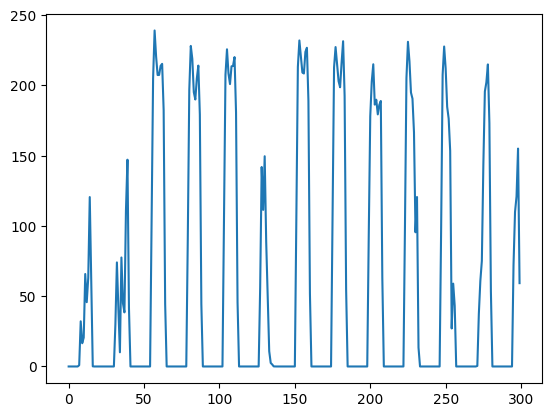

In [5]:
plt.plot(list(dataset.train)[0]["target"][0:300])
plt.show()

In [6]:
len(list(dataset.train))

137

In [7]:
list(dataset.train)[100]

{'target': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'start': Period('2006-01-01 00:00', 'H'),
 'feat_static_cat': array([100]),
 'item_id': 100}

In [8]:
estimator = TSMixerEstimator(
    prediction_length=dataset.metadata.prediction_length,
    context_length=dataset.metadata.prediction_length*4,
    freq=dataset.metadata.freq,
    scaling="std",

    # hidden_size=64,
    n_blocks=5,
    
    batch_size=128,
    num_batches_per_epoch=100,
    trainer_kwargs=dict(accelerator="gpu", max_epochs=20)
)

In [9]:
predictor = estimator.train(
    training_data=dataset.train, 
    cache_data=True, 
    shuffle_buffer_length=1024, 
    validation_data=dataset.test
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\maerzale\.virtualenvs\ConvTS_Mixer-3Rl3B8jo\lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type         | Params
---------------------------------------
0 | model | TSMixerModel | 49.4 K
---------------------------------------
49.4 K    Trainable params
0         Non-trainable params
49.4 K   

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 100: 'val_loss' reached 5.12849 (best 5.12849), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=0-step=100.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 200: 'val_loss' reached 5.01279 (best 5.01279), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=1-step=200.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 300: 'val_loss' reached 4.89925 (best 4.89925), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=2-step=300.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 400: 'val_loss' reached 4.78747 (best 4.78747), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=3-step=400.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 500: 'val_loss' reached 4.71906 (best 4.71906), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=4-step=500.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 600: 'val_loss' reached 4.61827 (best 4.61827), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=5-step=600.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 700: 'val_loss' reached 4.53016 (best 4.53016), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=6-step=700.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 800: 'val_loss' reached 4.44896 (best 4.44896), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=7-step=800.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 8, global step 900: 'val_loss' reached 4.36438 (best 4.36438), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=8-step=900.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 9, global step 1000: 'val_loss' reached 4.27057 (best 4.27057), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=9-step=1000.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 10, global step 1100: 'val_loss' reached 4.12575 (best 4.12575), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=10-step=1100.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 11, global step 1200: 'val_loss' reached 3.94512 (best 3.94512), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=11-step=1200.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 12, global step 1300: 'val_loss' reached 3.70422 (best 3.70422), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=12-step=1300.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 13, global step 1400: 'val_loss' reached 3.63661 (best 3.63661), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=13-step=1400.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 14, global step 1500: 'val_loss' reached 3.56902 (best 3.56902), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=14-step=1500.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 15, global step 1600: 'val_loss' reached 3.46929 (best 3.46929), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=15-step=1600.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 16, global step 1700: 'val_loss' reached 3.41369 (best 3.41369), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=16-step=1700.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 17, global step 1800: 'val_loss' reached 3.37334 (best 3.37334), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=17-step=1800.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 18, global step 1900: 'val_loss' reached 3.31220 (best 3.31220), saving model to 'C:\\Users\\maerzale\\OneDrive - adidas\\ConvTS Mixer\\lightning_logs\\version_6\\checkpoints\\epoch=18-step=1900.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 19, global step 2000: 'val_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=20` reached.


In [10]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,
    predictor=predictor,
)

In [11]:
forecasts = list(forecast_it)

In [12]:
tss = list(ts_it)

In [13]:
evaluator = Evaluator()

In [14]:
agg_metrics, ts_metrics = evaluator(iter(tss), iter(forecasts))

Running evaluation: 959it [00:40, 23.64it/s]


In [15]:
agg_metrics

{'MSE': 1108.6124749765406,
 'abs_error': 392006.4189834595,
 'abs_target_sum': 708873.5020904541,
 'abs_target_mean': 30.799161543728452,
 'seasonal_error': 13.175128459742648,
 'MASE': 1.2972824056206722,
 'MAPE': 3.5385973201676864,
 'sMAPE': 1.3875998574741855,
 'MSIS': 9.878595302574109,
 'QuantileLoss[0.1]': 160903.65626375453,
 'Coverage[0.1]': 0.13234271810914144,
 'QuantileLoss[0.2]': 275186.41586955194,
 'Coverage[0.2]': 0.21754431699687174,
 'QuantileLoss[0.3]': 342220.4133554071,
 'Coverage[0.3]': 0.299400417101147,
 'QuantileLoss[0.4]': 378512.2677536011,
 'Coverage[0.4]': 0.4133646159193604,
 'QuantileLoss[0.5]': 392006.4191954136,
 'Coverage[0.5]': 0.546793534932221,
 'QuantileLoss[0.6]': 384635.09811677935,
 'Coverage[0.6]': 0.6661452902328815,
 'QuantileLoss[0.7]': 354456.10925723315,
 'Coverage[0.7]': 0.7529979144942649,
 'QuantileLoss[0.8]': 296889.64469614025,
 'Coverage[0.8]': 0.8232533889468197,
 'QuantileLoss[0.9]': 205318.20507543086,
 'Coverage[0.9]': 0.8963764

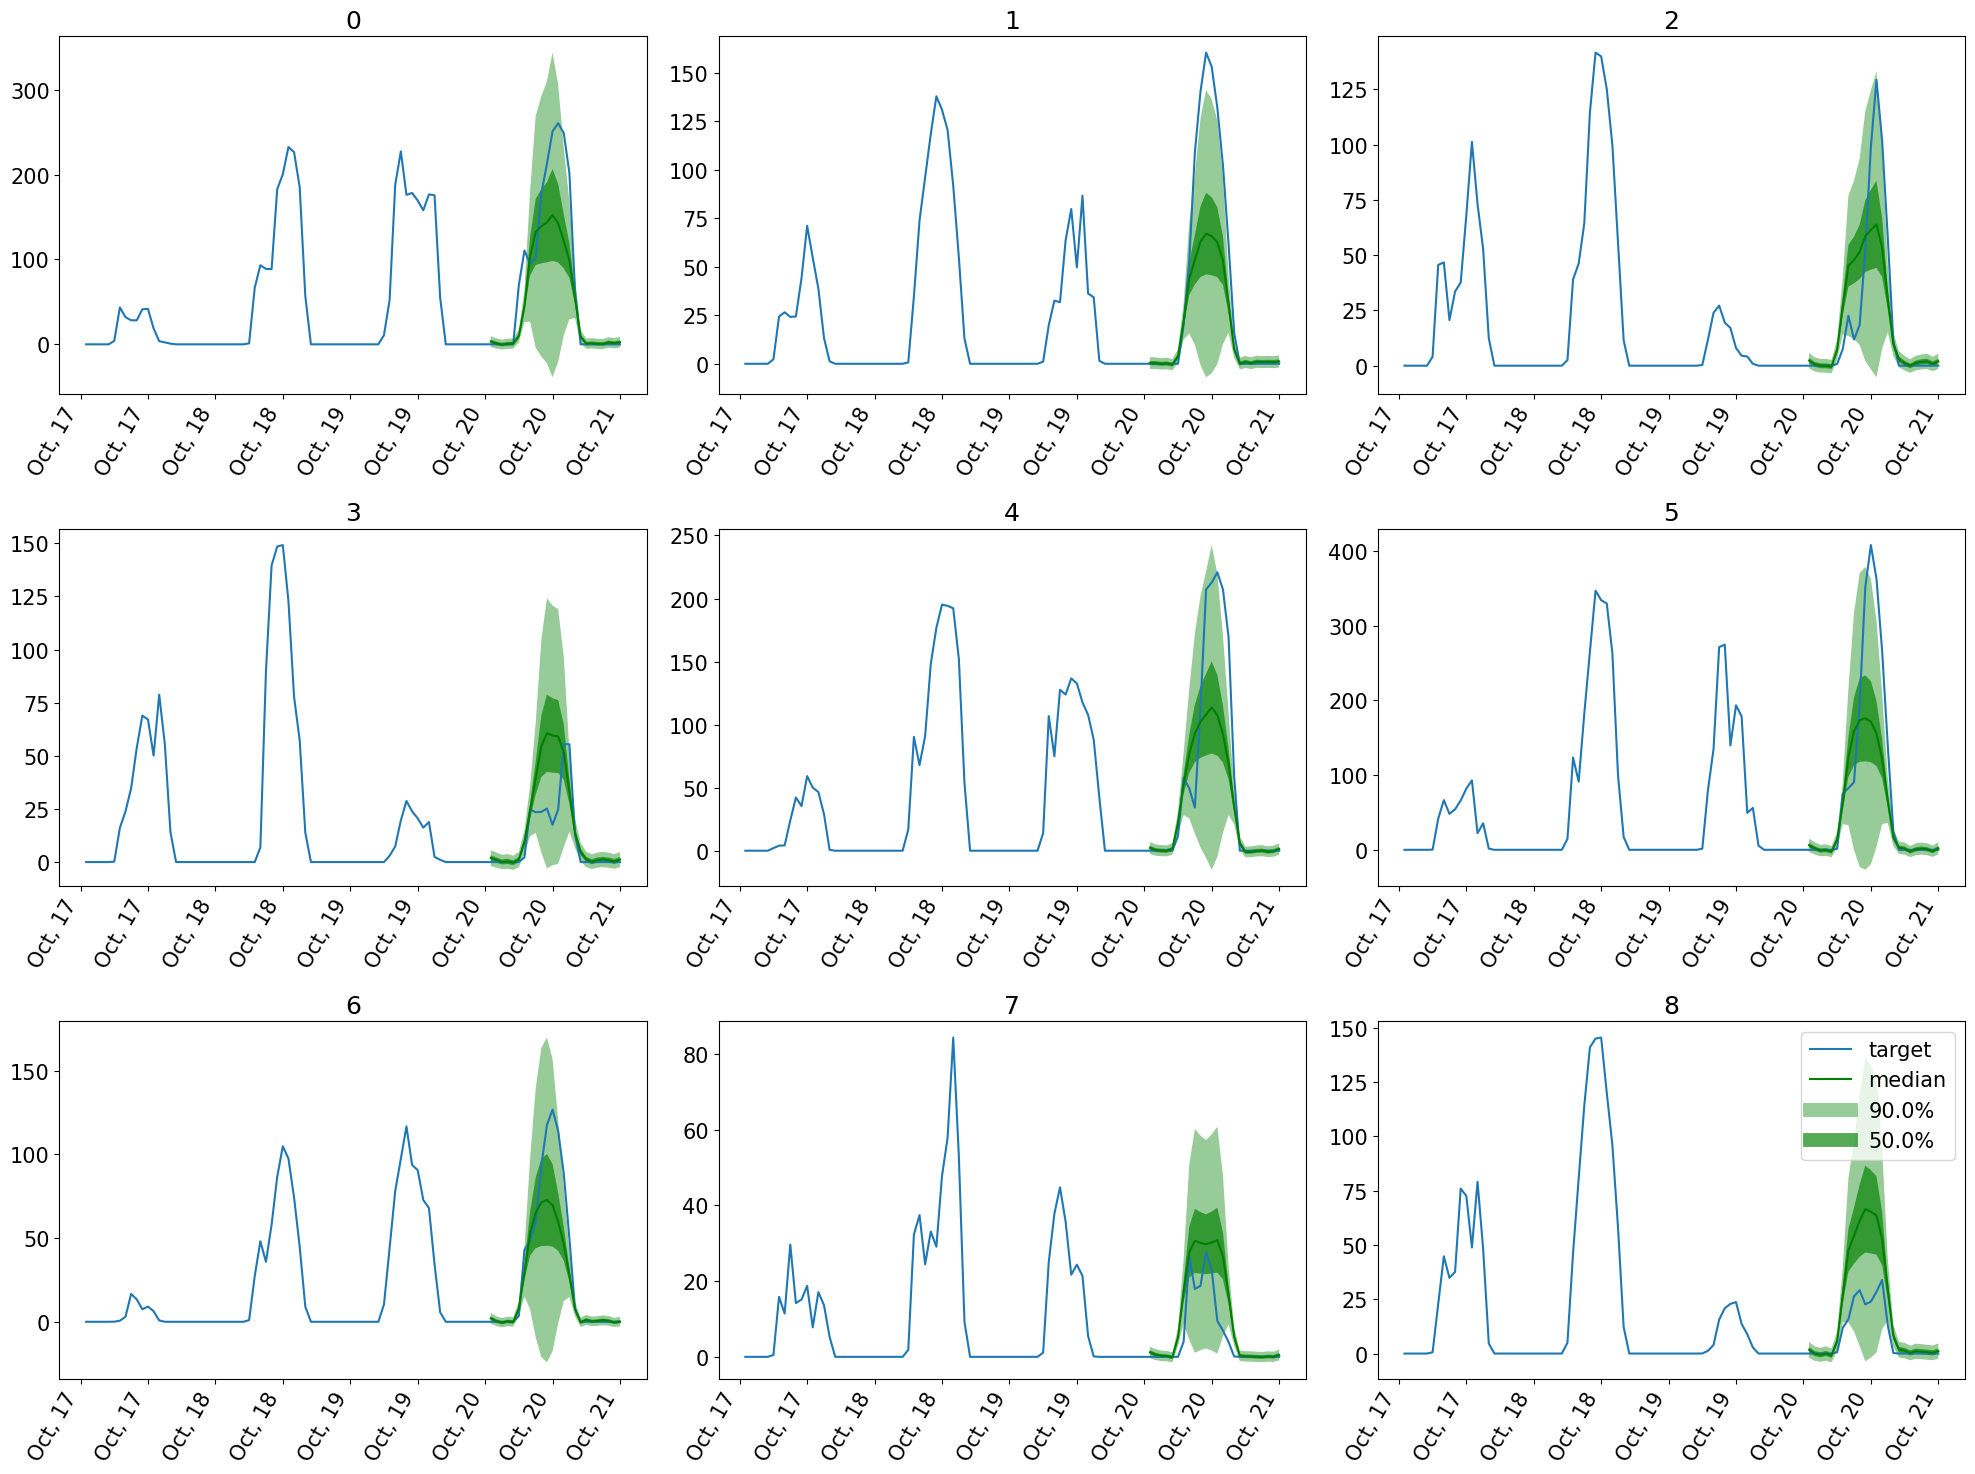

In [16]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)

    plt.plot(ts[-4 * dataset.metadata.prediction_length:].to_timestamp(), label="target", )
    forecast.plot( color='g')
    plt.xticks(rotation=60)
    ax.xaxis.set_major_formatter(date_formater)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()